
# Day-30: K-Means Clustering Algorithm

Welcome to Day 30! Today, we will dive into K-Means Clustering, one of the most popular and straightforward unsupervised learning algorithms. K-Means is a powerful tool for partitioning a dataset into a pre-defined number of distinct, non-overlapping subgroups or "clusters."

## Topics Covered:

-  What is K-Means Clustering?
- The Elbow Method for Choosing k

## What is K-Means Clustering?

The K-Means algorithm is an iterative process that aims to partition n data points into k clusters. It works by:

1. `Initializing` *k centroids* randomly in the feature space. A **centrod** is the center point of a cluster.

2. `Assigning` each data point to the closest centroid. The **"closest"** is typically determined by the *Euclidean distance.

3. `Updating` the centroids by calculating the **mean of all data points** assigned to that cluster.

4. `Repeating` steps 2 and 3 until the centroids no longer move significantly or a **maximum number of iterations is reached**.

The goal is to minimize the inertia, which is the sum of squared distances of samples to their closest cluster center.

`Analogy: Sorting Students in a Classroom`
- Imagine you have a classroom of students and you want to group them into four study groups (k=4).

1. You randomly choose four students to be the "group leaders" (the initial centroids).

2. All other students join the group of the leader they are closest to.

3. Once everyone is in a group, the "leaders" move to the center of their new groups.

4. All the students then re-evaluate and move to the group of the new closest leader.

5. This process repeats until the groups stabilize and no one wants to move to a different group.

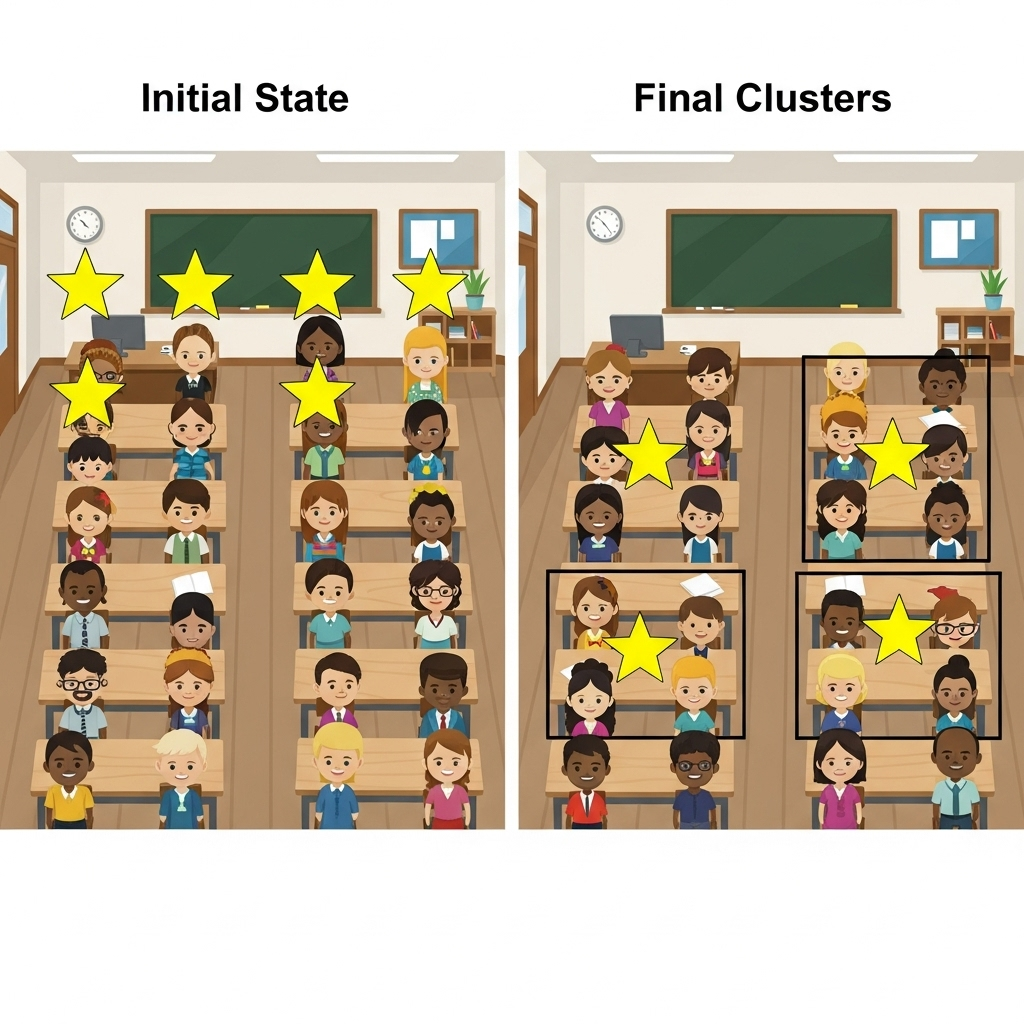

## The Elbow Method for chossing `k`

A critical challenge in K-Means is choosing the optimal number of clusters, k. 
The **Elbow Method** is a heuristic used to help find this value. 
It works by running the **K-Means algorithm** for a range of k values and plotting the inertia for each one.

- Inertia measures the compactness of the clusters; a lower inertia means a better clustering.

- The plot of inertia versus k will typically look like a bent arm. The "elbow" of the arm—the point where the rate of decrease in inertia sharply changes—is a good candidate for the optimal k.

## Code-example: Product-Based Market Segmentation

Imagine you are a data analyst for an e-commerce platform. The business wants to understand the different types of products in their catalog. By grouping similar products together, they can optimize inventory management, improve recommendation engines, or target specific marketing efforts. Since there are no pre-defined categories like "high-end electronics" or "low-cost accessories," this is an unsupervised learning problem.

The goal is to use K-Means clustering to segment products based on features like their ratings and number of reviews.

### Data loading

In [46]:
! pip install -U scikit-learn scipy matplotlib pandas seaborn yellowbrick

In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from yellowbrick.cluster import KElbowVisualizer

`dataset`: https://www.kaggle.com/datasets/lokeshparab/amazon-products-dataset

In [48]:
# dataloading
df = pd.read_csv('Amazon-Products.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      551585 non-null  int64 
 1   name            551585 non-null  object
 2   main_category   551585 non-null  object
 3   sub_category    551585 non-null  object
 4   image           551585 non-null  object
 5   link            551585 non-null  object
 6   ratings         375791 non-null  object
 7   no_of_ratings   375791 non-null  object
 8   discount_price  490422 non-null  object
 9   actual_price    533772 non-null  object
dtypes: int64(1), object(9)
memory usage: 42.1+ MB


In [49]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340680 entries, 0 to 340679
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      340680 non-null  int64 
 1   name            340680 non-null  object
 2   main_category   340680 non-null  object
 3   sub_category    340680 non-null  object
 4   image           340680 non-null  object
 5   link            340680 non-null  object
 6   ratings         340680 non-null  object
 7   no_of_ratings   340680 non-null  object
 8   discount_price  340680 non-null  object
 9   actual_price    340680 non-null  object
dtypes: int64(1), object(9)
memory usage: 26.0+ MB


In [50]:
df.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


In [51]:
# Corrected cleaning for the 'no_of_ratings' column
df['no_of_ratings'] = df['no_of_ratings'].astype(str).str.replace(',', '', regex=False)
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'], errors='coerce').fillna(0)
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce').fillna(0)

In [52]:
# Select ONLY the numerical features for clustering
X = df[['ratings', 'no_of_ratings']].dropna()

In [53]:
# --- Elbow method on scaled data (no pipeline here) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Finding optimal 'k' using the Elbow Method...


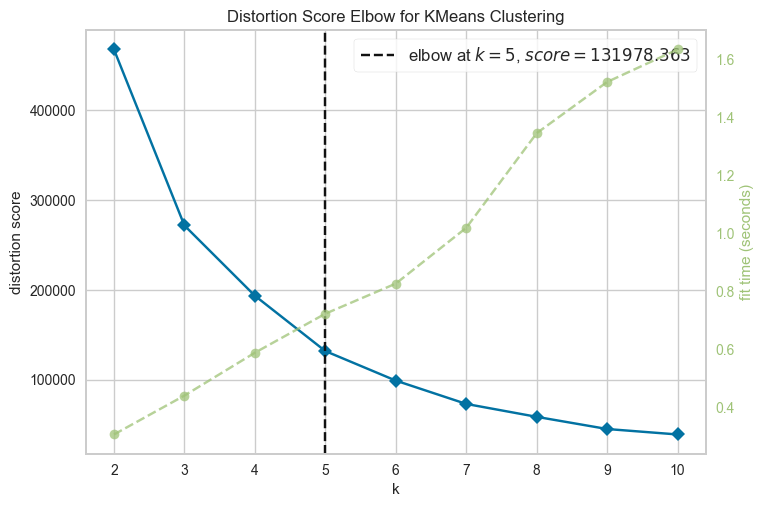

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
# Use KMeans directly; KElbowVisualizer will vary n_clusters
kmeans = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(kmeans, k=(2, 11), locate_elbow=True)

print("Finding optimal 'k' using the Elbow Method...")
visualizer.fit(X_scaled)
visualizer.show()
       

In [56]:
k_opt = visualizer.elbow_value_
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=k_opt, random_state=42, n_init=10))
])

final_pipeline.fit(X)
labels = final_pipeline.named_steps['kmeans'].labels_

# If you want the labels back on the dataframe:
df.loc[X.index, 'cluster'] = labels

In [57]:
df.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,cluster
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255.0,"₹32,999","₹58,990",4.0
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948.0,"₹46,490","₹75,990",4.0
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,1206.0,"₹34,490","₹61,990",4.0
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69.0,"₹37,990","₹68,990",1.0
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630.0,"₹34,490","₹67,790",4.0


k_opt = visualizer.elbow_value_
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=k_opt, random_state=42, n_init=10))
])

final_pipeline.fit(X)
labels = final_pipeline.named_steps['kmeans'].labels_

# If you want the labels back on the dataframe:
df.loc[X.index, 'cluster'] = labels

In [58]:

# Get the labels assigned to each data point
labels = final_pipeline.named_steps['kmeans'].labels_

# Get the cluster centroids
# We get the centroids from the KMeans step and then inverse transform them
# to get them back to the original data scale for plotting.
centroids = final_pipeline.named_steps['kmeans'].cluster_centers_
centroids_original = final_pipeline.named_steps['scaler'].inverse_transform(centroids)

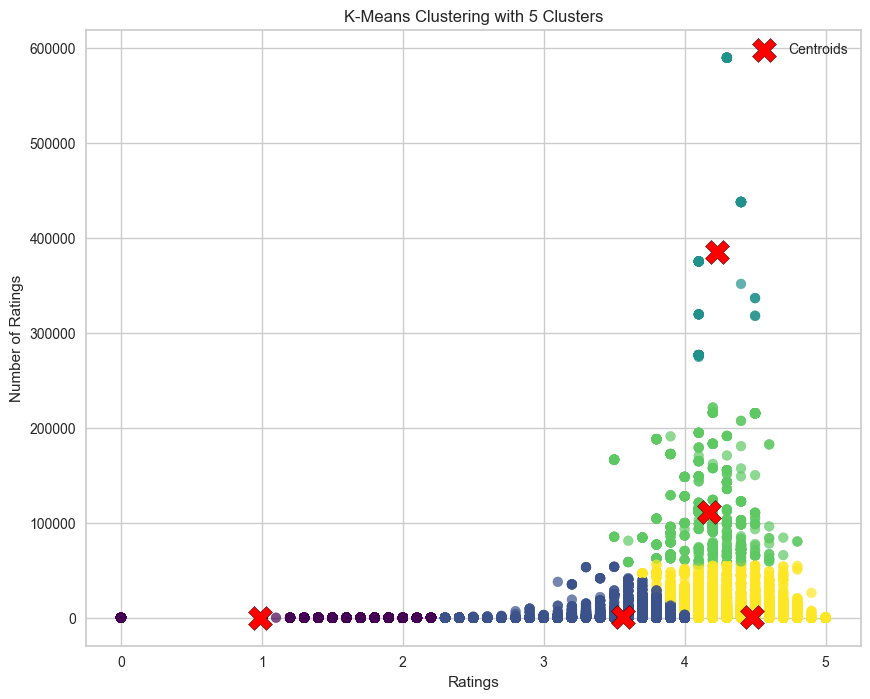

In [59]:
# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(df['ratings'], df['no_of_ratings'], c=df['cluster'], cmap='viridis', s=50, alpha=0.7)
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], 
            marker='X', s=300, color='red', edgecolor='black', label='Centroids')

plt.title('K-Means Clustering with 5 Clusters')
plt.xlabel('Ratings')
plt.ylabel('Number of Ratings')
plt.legend()
plt.grid(True)
plt.show()

Here's a breakdown of the segments based on the plot:

Cluster 1 (Low Ratings, Low Reviews): The purple points on the far left. These products have very few ratings and low review scores. They could be new products or products with very little user engagement.

Cluster 2 (Medium-High Ratings, Low Reviews): The navy blue points in the lower middle. These products have moderately high ratings (around 3.5 to 4.0), but still very few reviews.

Cluster 3 (Medium Ratings, Low Reviews): The yellow points in the bottom right. These products have a wide range of ratings (from 3.5 to over 4.5) and a low number of reviews.

Cluster 4 (Medium Ratings, Medium Reviews): The green points. These products have a healthy number of reviews, but their ratings are more dispersed, ranging from just under 4.0 to over 4.5.

Cluster 5 (High Ratings, High Reviews): The teal points at the top. This is the most valuable segment, containing products with both a very high number of ratings and high average review scores. These are likely the most popular and well-received products.

The red X marks are the centroids, representing the average position of each cluster. You can clearly see how the algorithm has found the center of each of these groups to represent the characteristics of that segment.